In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv("../data/synthetic_upi_fraud_detection_dataset_statistical.csv")
data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type,nameOrig,nameDest,isFraud
0,207.0,3.050489e+05,0.000000e+00,0.000000e+00,0.0,0.0,DEBIT,C9088186360,M9093866369,0
1,14.0,6.975819e+04,2.746027e+07,1.615655e+06,0.0,0.0,DEBIT,C6923517420,M9109836024,0
2,423.0,1.000000e+07,1.000000e+07,0.000000e+00,0.0,0.0,CASH_OUT,C969408296,M4689287504,1
3,207.0,1.094349e+05,0.000000e+00,0.000000e+00,0.0,0.0,PAYMENT,C8196855057,M5879237405,0
4,232.0,1.496116e+04,3.280421e+07,3.265746e+07,0.0,0.0,CASH_OUT,C7883328848,M5336902258,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            10000 non-null  float64
 1   amount          10000 non-null  float64
 2   oldbalanceOrg   10000 non-null  float64
 3   newbalanceOrig  10000 non-null  float64
 4   oldbalanceDest  10000 non-null  float64
 5   newbalanceDest  10000 non-null  float64
 6   type            10000 non-null  object 
 7   nameOrig        10000 non-null  object 
 8   nameDest        10000 non-null  object 
 9   isFraud         10000 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 781.4+ KB


In [4]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000
mean,275.669900,7.259914e+05,2.747679e+06,1.379007e+06,7.274214e+06,8.857085e+06,0.250000
std,174.140183,2.047546e+06,7.362077e+06,5.664113e+06,3.117199e+07,3.496824e+07,0.433034
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,156.000000,1.782272e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,259.000000,1.168999e+05,2.028422e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
75%,374.000000,3.149907e+05,5.588462e+05,0.000000e+00,0.000000e+00,4.201819e+05,0.250000
max,743.000000,2.974809e+07,5.794288e+07,3.285196e+07,2.362305e+08,2.367265e+08,1.000000


In [5]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 3
Integer variables: 1
Float variables: 6


<Axes: xlabel='type', ylabel='count'>

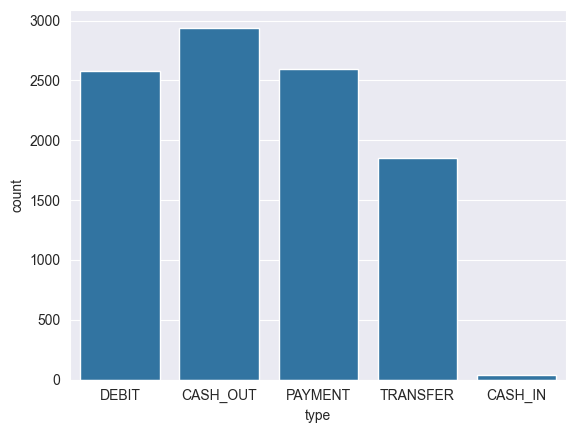

In [6]:
sns.countplot(x='type', data=data)

<Axes: xlabel='type', ylabel='amount'>

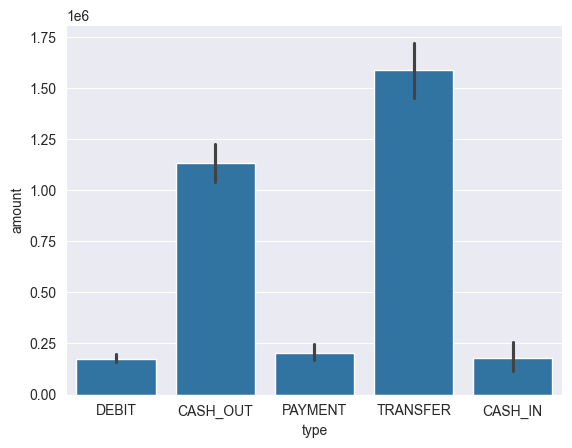

In [7]:
sns.barplot(x='type', y='amount', data=data)

In [8]:
counts = data['isFraud'].value_counts()
counts

isFraud
0    7500
1    2500
Name: count, dtype: int64

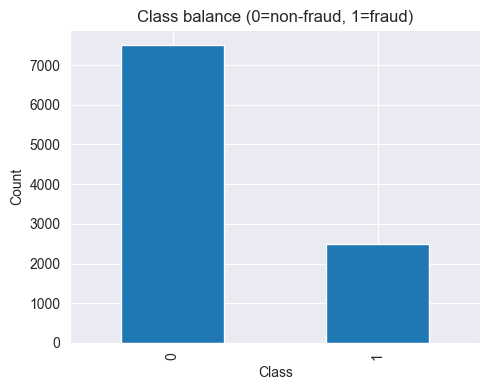

In [9]:
# Plot class balance
plt.figure(figsize=(5,4))
counts.plot(kind='bar')
plt.title('Class balance (0=non-fraud, 1=fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

<Axes: xlabel='step', ylabel='Count'>

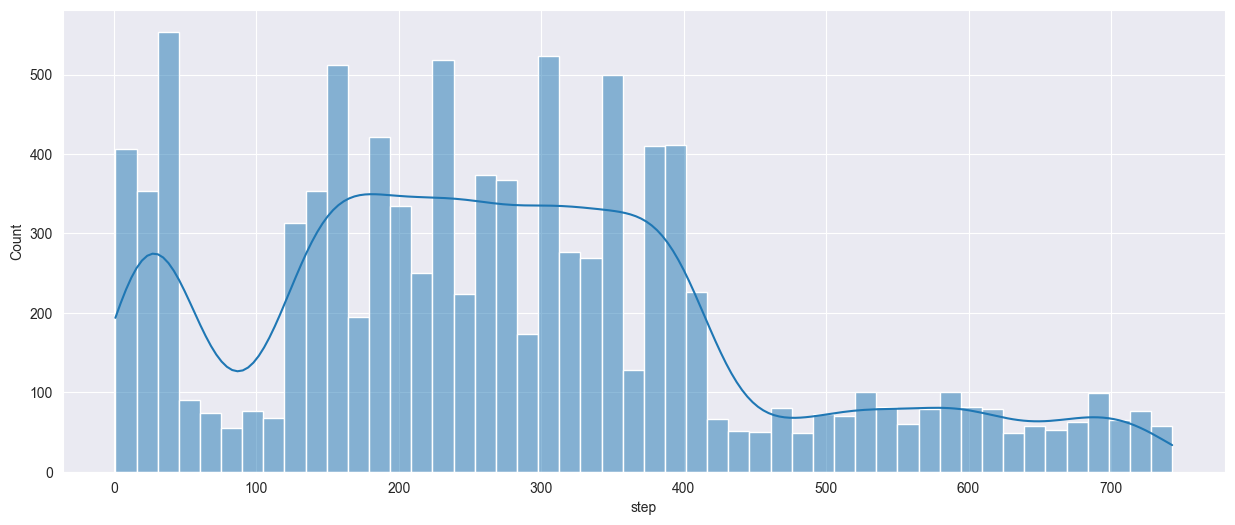

In [10]:
plt.figure(figsize=(15, 6))
sns.histplot(data['step'], bins=50, kde=True)

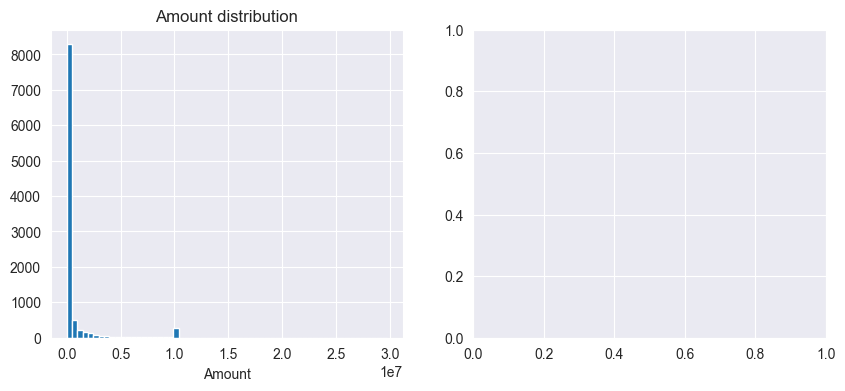

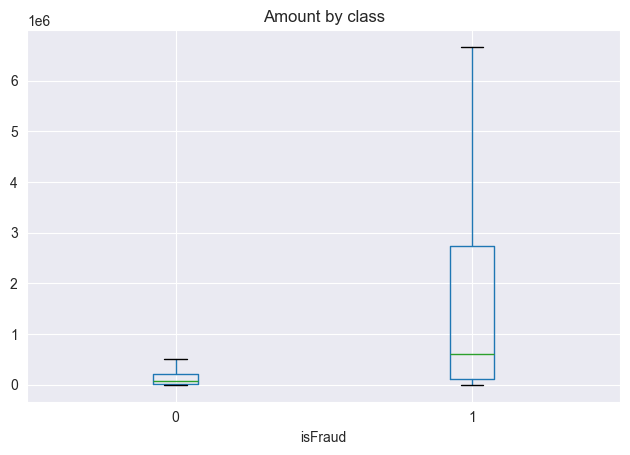

In [11]:
# Plot histogram of amount and boxplot by class
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(data['amount'].dropna(), bins=60)
plt.title('Amount distribution')
plt.xlabel('Amount')

plt.subplot(1,2,2)
data.boxplot(column='amount', by='isFraud', showfliers=False)
plt.title('Amount by class')
plt.suptitle('')
plt.tight_layout()
plt.show()

<Axes: >

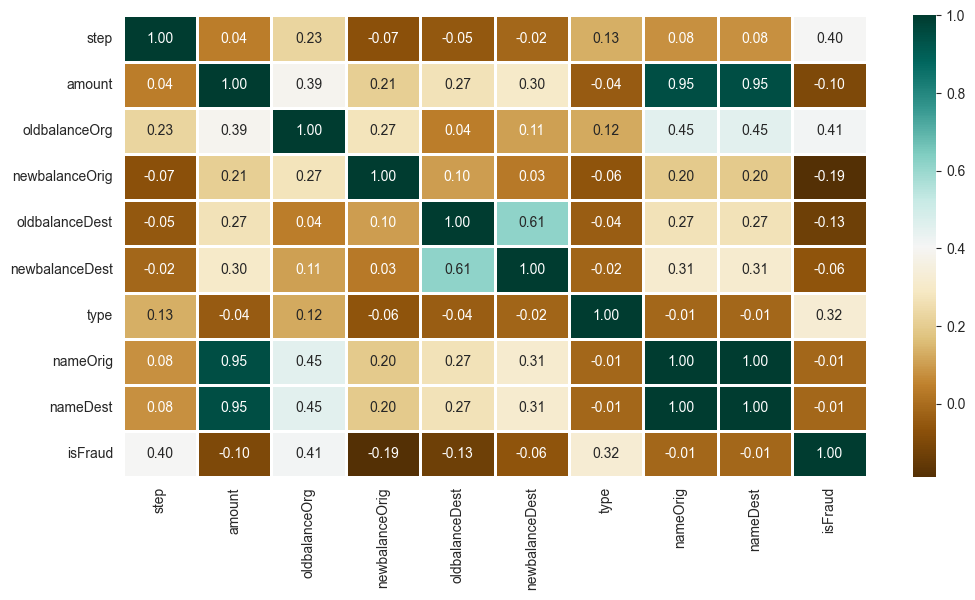

In [12]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.apply(lambda x: pd.factorize(x)[0]).corr(),
			cmap='BrBG',
			fmt='.2f',
			linewidths=2,
			annot=True)

In [13]:
type_new = pd.get_dummies(data['type'], drop_first=True)
data_new = pd.concat([data, type_new], axis=1)
data_new.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type,nameOrig,nameDest,isFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,207.0,3.050489e+05,0.000000e+00,0.000000e+00,0.0,0.0,DEBIT,C9088186360,M9093866369,0,False,True,False,False
1,14.0,6.975819e+04,2.746027e+07,1.615655e+06,0.0,0.0,DEBIT,C6923517420,M9109836024,0,False,True,False,False
2,423.0,1.000000e+07,1.000000e+07,0.000000e+00,0.0,0.0,CASH_OUT,C969408296,M4689287504,1,True,False,False,False
3,207.0,1.094349e+05,0.000000e+00,0.000000e+00,0.0,0.0,PAYMENT,C8196855057,M5879237405,0,False,False,True,False
4,232.0,1.496116e+04,3.280421e+07,3.265746e+07,0.0,0.0,CASH_OUT,C7883328848,M5336902258,0,True,False,False,False


In [14]:
X = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = data_new['isFraud']

In [15]:
X.shape, y.shape

((10000, 10), (10000,))

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# Baseline Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# Tree-based models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
# Advanced models
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [19]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(probability=True, kernel='rbf', random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=7,criterion='entropy',random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
}

In [20]:
from sklearn.metrics import (
    roc_auc_score, classification_report,
    confusion_matrix, f1_score
)

results = []

for name, model in models.items():
    print(f'\n--- {name} ---')

    # Scaled input for models needing it
    if name in ['SVM', 'KNN', 'Logistic Regression']:
        model.fit(X_train_scaled, y_train)
        y_train_pred = model.predict_proba(X_train_scaled)[:, 1]
        y_test_pred = model.predict_proba(X_test_scaled)[:, 1]
        y_test_label = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_train_pred = model.predict_proba(X_train)[:, 1]
        y_test_pred = model.predict_proba(X_test)[:, 1]
        y_test_label = model.predict(X_test)

    train_auc = roc_auc_score(y_train, y_train_pred)
    test_auc = roc_auc_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_label, pos_label=1)

    print(f'Train ROC-AUC: {train_auc:.3f}')
    print(f'Test ROC-AUC: {test_auc:.3f}')
    print(f'F1-Score (Fraud class): {f1:.3f}')
    print(classification_report(y_test, y_test_label, digits=3))

    results.append({
        'Model': name,
        'Train ROC-AUC': train_auc,
        'Test ROC-AUC': test_auc,
        'F1-Score': f1,
        'Confusion Matrix': confusion_matrix(y_test, y_test_label),
        'Report': classification_report(y_test, y_test_label, output_dict=True)
    })


--- Logistic Regression ---
Train ROC-AUC: 0.958
Test ROC-AUC: 0.955
F1-Score (Fraud class): 0.770
              precision    recall  f1-score   support

           0      0.905     0.944     0.924      2206
           1      0.823     0.724     0.770       794

    accuracy                          0.886      3000
   macro avg      0.864     0.834     0.847      3000
weighted avg      0.883     0.886     0.883      3000


--- KNN ---
Train ROC-AUC: 0.992
Test ROC-AUC: 0.955
F1-Score (Fraud class): 0.859
              precision    recall  f1-score   support

           0      0.937     0.968     0.952      2206
           1      0.902     0.820     0.859       794

    accuracy                          0.929      3000
   macro avg      0.919     0.894     0.906      3000
weighted avg      0.928     0.929     0.928      3000


--- Naive Bayes ---
Train ROC-AUC: 0.878
Test ROC-AUC: 0.874
F1-Score (Fraud class): 0.471
              precision    recall  f1-score   support

           0   

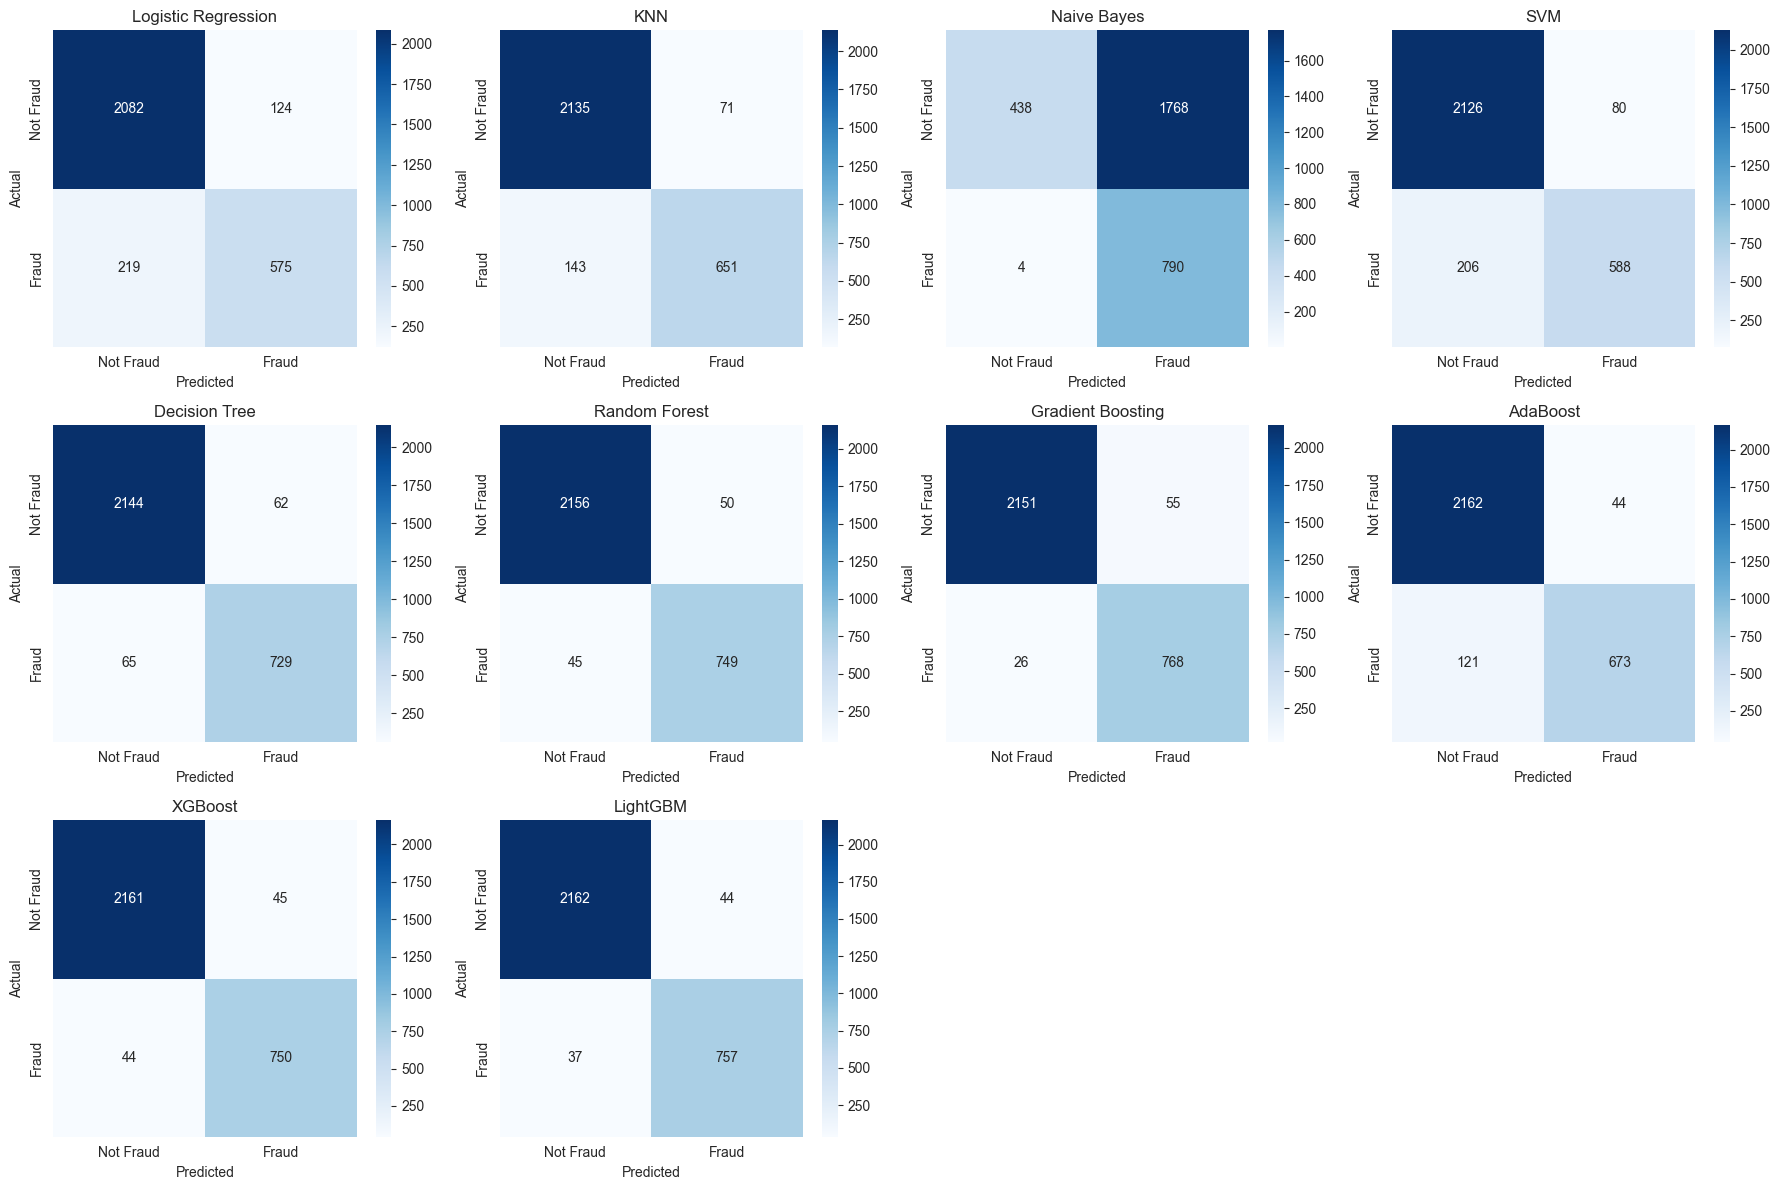

In [21]:
plt.figure(figsize=(18,12))
for i, res in enumerate(results):
    plt.subplot(3,4,i+1)
    sns.heatmap(res['Confusion Matrix'], annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.title(res['Model'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.tight_layout()
plt.show()

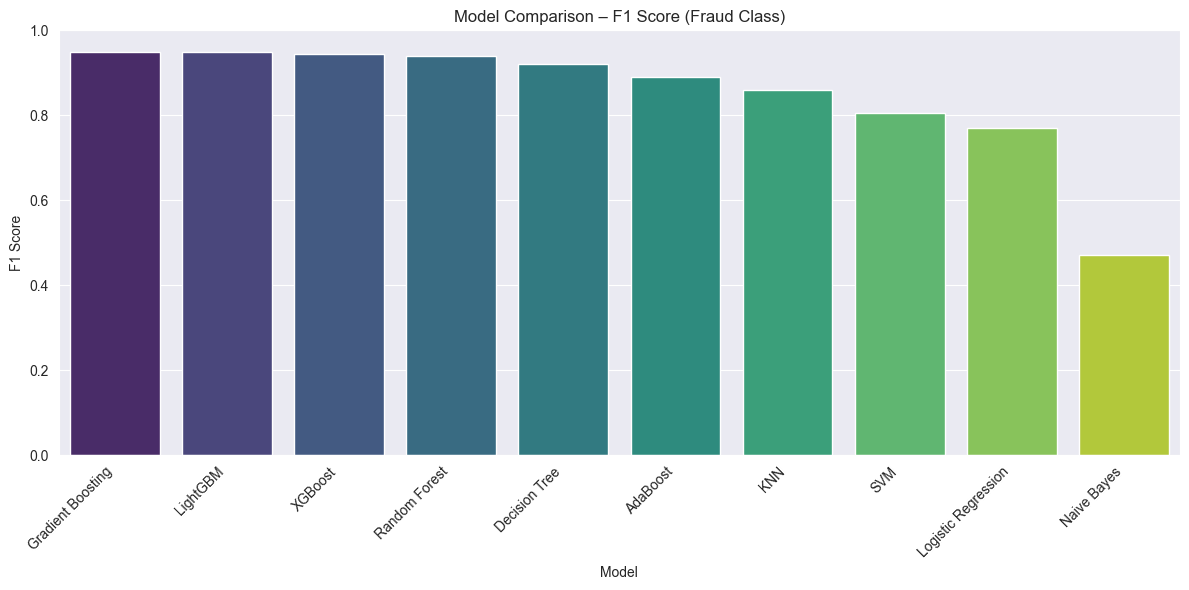

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert results to a DataFrame
f1_df = pd.DataFrame(results)[['Model', 'F1-Score']].sort_values('F1-Score', ascending=False)

# Plot vertical bars
plt.figure(figsize=(12,6))
sns.barplot(x='Model', y='F1-Score', hue='Model', data=f1_df, palette='viridis', legend=False)
plt.title('Model Comparison – F1 Score (Fraud Class)')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [23]:
# Create DataFrame of results
results_df = pd.DataFrame(results)

# Sort models by F1 score (descending)
results_df = results_df.sort_values('F1-Score', ascending=False).reset_index(drop=True)

# Display ranking
print(results_df[['Model', 'F1-Score']])

# Select best-performing model
best_model_name = results_df.loc[0, 'Model']
best_model = models[best_model_name]

print(f'\nBest model based on F1-Score: {best_model_name}')

                 Model  F1-Score
0    Gradient Boosting  0.949907
1             LightGBM  0.949216
2              XGBoost  0.943990
3        Random Forest  0.940364
4        Decision Tree  0.919874
5             AdaBoost  0.890801
6                  KNN  0.858839
7                  SVM  0.804378
8  Logistic Regression  0.770261
9          Naive Bayes  0.471360

Best model based on F1-Score: Gradient Boosting


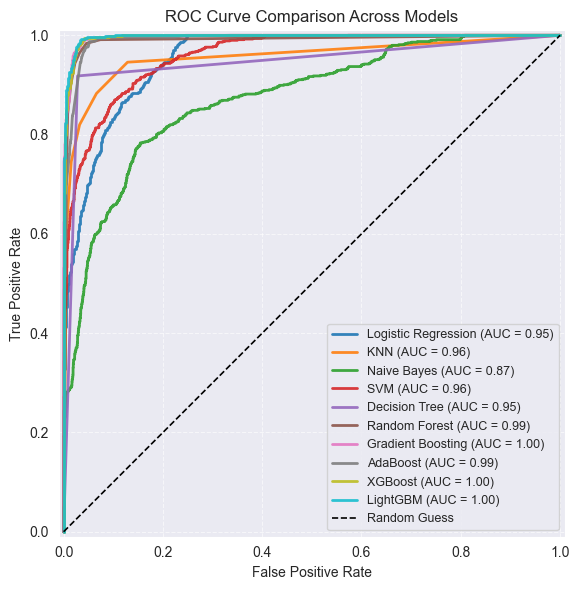

In [24]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Plot ROC curves for all models on the same figure
for name, model in models.items():
    if name in ['SVM', 'KNN', 'Logistic Regression']:
        RocCurveDisplay.from_estimator(
            model, X_test_scaled, y_test, name=name,
            ax=plt.gca(),
            curve_kwargs={'alpha': 0.9, 'lw': 2}
        )
    else:
        RocCurveDisplay.from_estimator(
            model, X_test, y_test, name=name,
            ax=plt.gca(),
            curve_kwargs={'alpha': 0.9, 'lw': 2}
        )

# Add diagonal reference line
plt.plot([0, 1], [0, 1], 'k--', lw=1.2, label='Random Guess')

# Formatting
plt.title('ROC Curve Comparison Across Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right', fontsize=9)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Best model based on F1-Score: Gradient Boosting


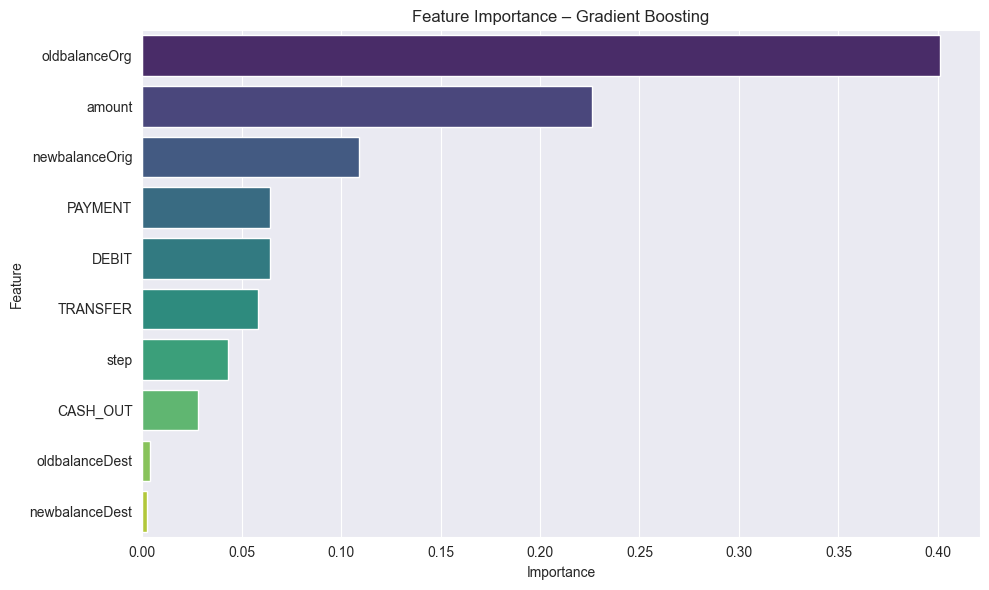

In [25]:
# Feature importance for best model (by F1)
import numpy as np

best_model_name = f1_df.iloc[0]['Model']
best_model = models[best_model_name]

print(f'Best model based on F1-Score: {best_model_name}')

# --- Feature Importance (model-based) ---
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    indices = np.argsort(importances)[::-1]
    features = X.columns[indices]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances[indices], y=features, hue=features, palette='viridis', legend=False)
    plt.title(f'Feature Importance – {best_model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()
else:
    print(f'{best_model_name} has no built-in feature importance.')

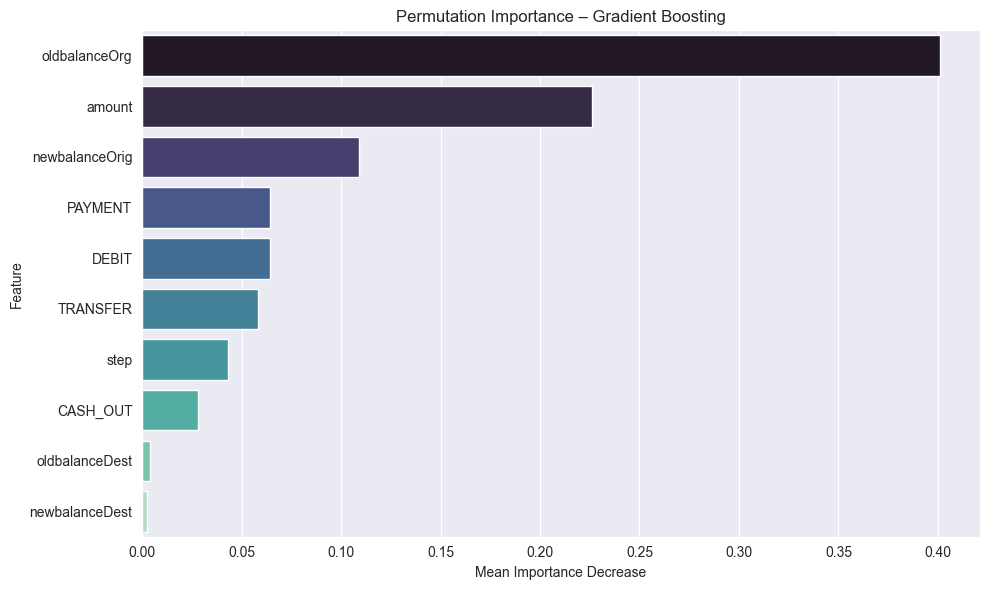

In [26]:
from sklearn.inspection import permutation_importance

# Handle scaled input for models that require scaling
if best_model_name in ['SVM', 'KNN', 'Logistic Regression']:
    X_input = X_test_scaled
else:
    X_input = X_test

result = permutation_importance(
    best_model, X_input, y_test,
    n_repeats=10, random_state=42, n_jobs=-1
)

perm_sorted_idx = result.importances_mean.argsort()
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features, hue=features, palette='mako', legend=False)
plt.title(f'Permutation Importance – {best_model_name}')
plt.xlabel('Mean Importance Decrease')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()